In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./student_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor_', 'cgpa', 'research', 'chance_of_admit_'],
      dtype='object')

In [6]:
df.head()

,serial_no.,gre_score,toefl_score,university_rating,sop,lor_,cgpa,research,chance_of_admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
df.isnull().sum()

serial_no.           0
gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor_                 0
cgpa                 0
research             0
chance_of_admit_     0
dtype: int64

<Axes: xlabel='chance_of_admit_', ylabel='Count'>

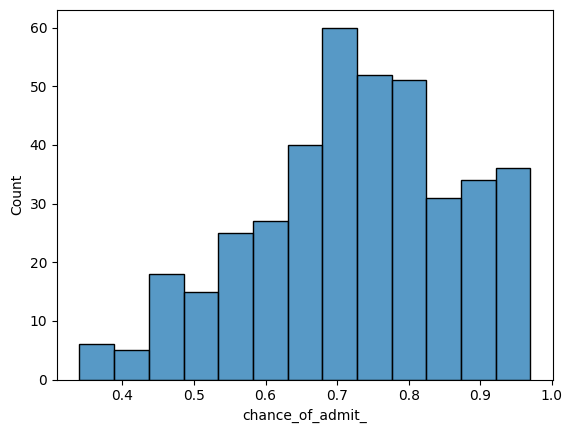

In [15]:
sns.histplot(df.chance_of_admit_)

### Validation Framework

In [18]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 *n)
n_train = n - (n_val + n_test)

np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train: n_train+ n_val].copy()
df_test = df_shuffled.iloc[n_val: n_val + n_test].copy()

In [19]:
y_train = df_train.chance_of_admit_.values
y_val = df_val.chance_of_admit_.values
y_test = df_test.chance_of_admit_.values

In [20]:
del df_train['chance_of_admit_']
del df_val['chance_of_admit_']
del df_test['chance_of_admit_']

### Machine Learning for Regression

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = (XTX_inv).dot(X.T).dot(y)
    return w[0], w[1:]

In [24]:
base = ['serial_no.', 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor_', 'cgpa', 'research']
base

['serial_no.',
 'gre_score',
 'toefl_score',
 'university_rating',
 'sop',
 'lor_',
 'cgpa',
 'research']

In [26]:
df_num = df_train[base]


In [27]:
X_train = df_num.values

In [28]:
w_0, w = train_linear_regression(X_train, y_train)

In [29]:
y_pred = w_0 + X_train.dot(w)

In [30]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [31]:
rmse(y_train, y_pred)

0.06078800326573864

In [36]:
base = [ 'gre_score', 'toefl_score', 'university_rating', 'sop',
       'lor_', 'cgpa', 'research']

In [37]:
def prepare_X(df):
    df_num = df.copy()
    df_num = df_num[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = prepare_X(df_train)
w_0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('Validation: ', rmse(y_val, y_pred))

Validation:  0.0700082847317746


In [48]:
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print(rmse(y_test,y_pred))

0.0548045367249424
